# Classifying Fashion-MNIST

Now it's your turn to build and train a neural network. You'll be using the [Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist), a drop-in replacement for the MNIST dataset. MNIST is actually quite trivial with neural networks where you can easily achieve better than 97% accuracy. Fashion-MNIST is a set of 28x28 greyscale images of clothes. It's more complex than MNIST, so it's a better representation of the actual performance of your network, and a better representation of datasets you'll use in the real world.

<img src='assets/fashion-mnist-sprite.png' width=500px>

In this notebook, you'll build your own neural network. For the most part, you could just copy and paste the code from Part 3, but you wouldn't be learning. It's important for you to write the code yourself and get it to work. Feel free to consult the previous notebooks though as you work through this.

First off, let's load the dataset through torchvision.

In [1]:
import torch
from torchvision import datasets, transforms
import helper

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

Here we can see one of the images.

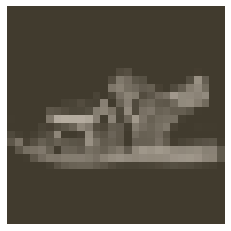

In [2]:
image, label = next(iter(trainloader))
helper.imshow(image[0,:]);

## Building the network

Here you should define your network. As with MNIST, each image is 28x28 which is a total of 784 pixels, and there are 10 classes. You should include at least one hidden layer. We suggest you use ReLU activations for the layers and to return the logits or log-softmax from the forward pass. It's up to you how many layers you add and the size of those layers.

In [3]:
# TODO: Define your network architecture here
from torch import nn

Fmodel = nn.Sequential(nn.Linear(784,128),
                      nn.ReLU(),
                      nn.Linear(128,64),
                      nn.ReLU(),
                      nn.Linear(64,10),
                      nn.LogSoftmax(dim = 1))

# Train the network

Now you should create your network and train it. First you'll want to define [the criterion](http://pytorch.org/docs/master/nn.html#loss-functions) ( something like `nn.CrossEntropyLoss`) and [the optimizer](http://pytorch.org/docs/master/optim.html) (typically `optim.SGD` or `optim.Adam`).

Then write the training code. Remember the training pass is a fairly straightforward process:

* Make a forward pass through the network to get the logits 
* Use the logits to calculate the loss
* Perform a backward pass through the network with `loss.backward()` to calculate the gradients
* Take a step with the optimizer to update the weights

By adjusting the hyperparameters (hidden units, learning rate, etc), you should be able to get the training loss below 0.4.

In [4]:
# TODO: Create the network, define the criterion and optimizer

from torch import optim

criterion = nn.NLLLoss()
optimizer = optim.SGD(Fmodel.parameters(), lr=0.01, momentum=0.9)


In [ ]:
# TODO: Train the network here

dataiter = iter(testloader)
images,labels = dataiter.next()



epoch = 500
for e in range(epoch):
    running_loss = 0
    for images,labels in trainloader:
        optimizer.zero_grad()
        img = images.view(images.shape[0],-1)
        
        output = Fmodel.forward(img)
        loss = criterion(output,labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
        
    print(e,'  ',running_loss)
    if running_loss < 0.02:
            break


0    550.3382016271353
1    375.56592597067356
2    338.62016513198614
3    313.13665563613176
4    294.72836423665285
5    277.8041249960661
6    267.80521538853645
7    257.6654259338975
8    246.07703080773354
9    237.29010149091482
10    230.6597241871059
11    224.57790855690837
12    215.2574059329927
13    210.4977199845016
14    202.929808229208
15    198.0123761445284
16    191.1931513696909
17    186.08813731372356
18    184.083084192127
19    173.7953407727182
20    170.7920632213354
21    168.73946020007133
22    160.58914482407272
23    158.1359963659197
24    154.94540968723595
25    152.16002898290753
26    147.24666187912226
27    139.8297650720924
28    138.78735125996172
29    134.9124093670398
30    132.17539763078094
31    129.9143412867561
32    125.1421449771151
33    121.49993929825723
34    120.41232481878251
35    116.86127166822553
36    113.07986519299448
37    112.00389801803976
38    107.6768952277489
39    105.29976293351501
40    103.15165312681347
41   

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper

# Test out your network!

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[0]
# Convert 2D image to 1D vector
img = img.resize_(1, 784)

# TODO: Calculate the class probabilities (softmax) for img
ps = torch.exp(Fmodel(img))

# Plot the image and probabilities
helper.view_classify(img.resize_(1, 28, 28), ps, version='Fashion')